In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Dense, MaxPooling2D, Dropout, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Accuracy
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
print("Num GPUs Avaible: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Avaible:  1


## Preprocessing Image

In [3]:
# menentukan direktori dari dataset training dan validation yang digunakan
train_dir = 'dataset/train'
valid_dir = 'dataset/valid'

In [4]:
# menentukan ukuran gambar pada proses training
# artinya setiap gambar pada dataset akan diubah ukurannya menjadi ke sebuah ukuran
# yang telah ditentukan
img_width, img_height, channel = (220, 220, 3)

In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 7274 images belonging to 5 classes.


In [6]:
valid_datagen = ImageDataGenerator(
    rescale = 1./255
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_width, img_width),
    batch_size=16,
    class_mode='categorical'
)

Found 902 images belonging to 5 classes.


## Modelling

In [7]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channel)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 218, 218, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 107, 107, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 51, 51, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0

In [9]:
from tensorflow.keras.metrics import Recall, Precision

model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics= [Recall(), Precision(), "accuracy"]
)

In [10]:
model_callback = EarlyStopping(
    monitor = 'loss',
    verbose = 1,
    mode = 'min',
    patience= 3
)

history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=30,
    steps_per_epoch=50,
    callbacks = [model_callback],
    verbose=1
)

Epoch 1/30
50/50 [==============================] - 25s 284ms/step - loss: 1.5716 - recall: 0.0200 - precision: 0.3200 - accuracy: 0.3013 - val_loss: 2.1523 - val_recall: 0.2384 - val_precision: 0.2526 - val_accuracy: 0.2439
Epoch 2/30
50/50 [==============================] - 11s 226ms/step - loss: 1.3670 - recall: 0.1063 - precision: 0.4830 - accuracy: 0.4050 - val_loss: 1.2975 - val_recall: 0.3149 - val_precision: 0.4913 - val_accuracy: 0.4324
Epoch 3/30
50/50 [==============================] - 12s 233ms/step - loss: 1.2611 - recall: 0.2175 - precision: 0.5724 - accuracy: 0.4837 - val_loss: 1.1852 - val_recall: 0.3337 - val_precision: 0.5722 - val_accuracy: 0.5022
Epoch 4/30
50/50 [==============================] - 11s 227ms/step - loss: 1.1458 - recall: 0.3500 - precision: 0.6292 - accuracy: 0.5238 - val_loss: 1.2097 - val_recall: 0.3914 - val_precision: 0.5883 - val_accuracy: 0.5022
Epoch 5/30
50/50 [==============================] - 11s 224ms/step - loss: 1.1624 - recall: 0.3162 -

In [11]:
model.evaluate(valid_data)

57/57 [==============================] - 5s 79ms/step - loss: 0.8031 - recall: 0.5477 - precision: 0.8247 - accuracy: 0.7118


[0.8031172156333923,
 0.5476718544960022,
 0.8247078657150269,
 0.7117516398429871]

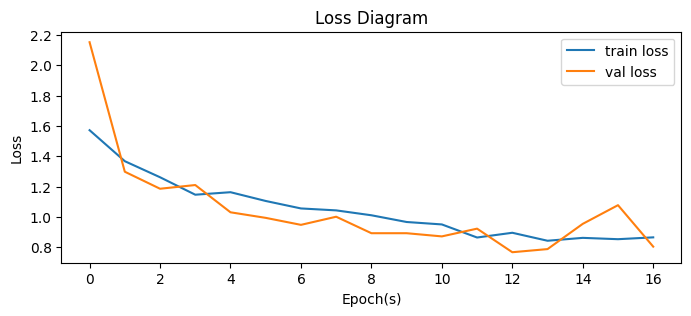

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.legend(['train loss', 'val loss'])
plt.title('Loss Diagram')
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')
plt.show()

In [13]:
model.save('model_acc_73.h5')